In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_x = pd.read_csv('Data/linearX.csv')
df_y = pd.read_csv('Data/linearY.csv')

df_x = df_x.reset_index(drop=True)
df_y = df_y.reset_index(drop=True)

merged_df = pd.merge(df_x, df_y, left_index=True, right_index=True)

In [3]:
merged_df.head()

,9.1,0.99523
0,8.0,0.99007
1,9.1,0.99769
2,8.4,0.99386
3,6.9,0.99508
4,7.7,0.99630


In [4]:
merged_df.columns = ['x', 'y']
merged_df = merged_df.reset_index(drop=True)

# Display the updated dataframe
print(merged_df)

       x        y
0    8.0  0.99007
1    9.1  0.99769
2    8.4  0.99386
3    6.9  0.99508
4    7.7  0.99630
..   ...      ...
94   7.8  0.99620
95  10.2  0.99760
96   6.1  0.99464
97   7.3  0.99830
98   7.3  0.99670

[99 rows x 2 columns]


In [5]:
df = merged_df

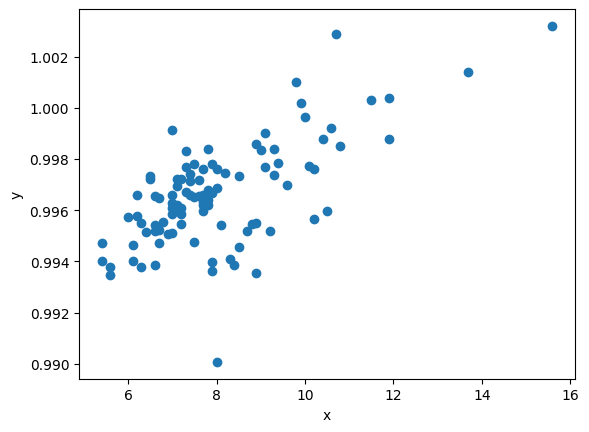

In [6]:
# Linear regression
# y = mx + b
# m is slope, b is y-intercept
# m = (mean(x) * mean(y) - mean(x*y)) / (mean(x)^2 - mean(x^2))
# b = mean(y) - m * mean(x)

# Calculate m and b
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
          ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    return m, b

# Calculate mean
def mean(values):
    return sum(values) / float(len(values))

# Plot the data
xs = np.array(df['x'], dtype=np.float64)
ys = np.array(df['y'], dtype=np.float64)
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

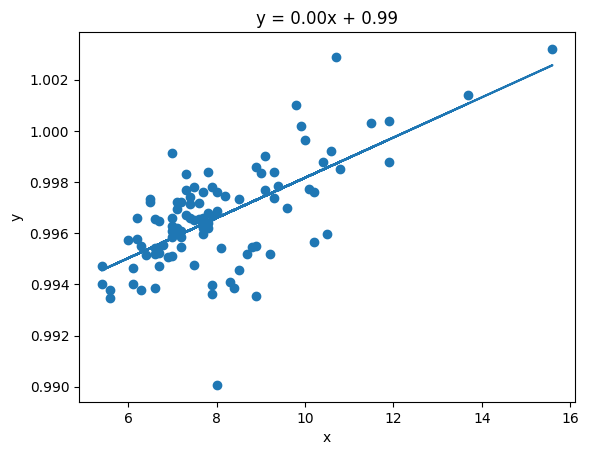

In [7]:
# Plot the regression line
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs]
# print(regression_line)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Enter x: 11


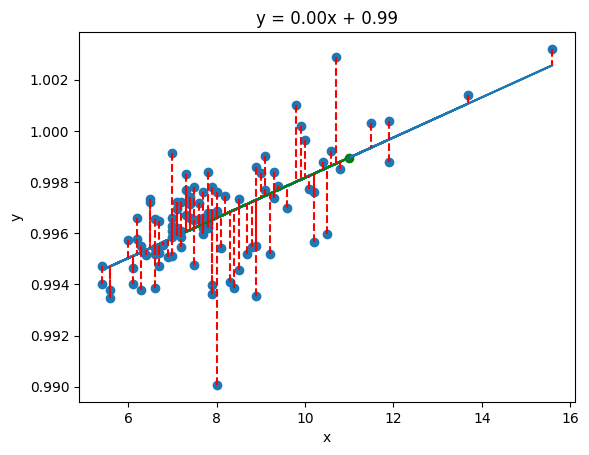

In [8]:
# Predict y for a given x
predict_x = float(input('Enter x: '))
predict_y = (m*predict_x)+b

# Plot the prediction
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
# Plot the prediction line
extended_x = [xs[-1], predict_x]
plt.plot(extended_x, [regression_line[-1], predict_y], color='g')
for i in range(len(xs)):
    plt.plot([xs[i], xs[i]], [ys[i], regression_line[i]], color='r', linestyle='--')
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
# Calculate squared error
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

# Calculate coefficient of determination
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

print("Coefficient of Determination: ", coefficient_of_determination(ys, regression_line))

Coefficient of Determination:  0.4381850455791929


# Using Cost Function
It turns out that to make the best line to model the data, we want to pick parameters $\theta$ that allows our predicted value to be as close to the actual value as possible.

So we formally define a cost function using ordinary least squares that is simply the sum of the squared distances. To find the liner regression line, we minimize:
$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

 - Set your learning rate to 0.5.
 - Gradient descent means taking small steps or jumps until found local minima

In [10]:

# Load independent variable data
independent_data_url = "https://drive.google.com/uc?id=1cFZHElm5ebn1OolgmrLOxw91T8am3S5C"
independent_data = pd.read_csv(independent_data_url)

# Load dependent variable data
dependent_data_url = "https://drive.google.com/uc?id=1rY3oTHxa1FT3fdcjWuKKQ4DOXnU8AeQM"
dependent_data = pd.read_csv(dependent_data_url)

In [11]:
# Applying standardization
independent_data = (independent_data - independent_data.mean()) / independent_data.std()

In [12]:
independent_data.columns = ['x']
independent_data = independent_data.reset_index(drop=True)

In [13]:
print(independent_data)

           x
0  -0.029650
1   0.603471
2   0.200575
3  -0.662771
4  -0.202320
..       ...
94 -0.144763
95  1.236591
96 -1.123223
97 -0.432545
98 -0.432545

[99 rows x 1 columns]


In [14]:
dependent_data.columns = ['y']
dependent_data = dependent_data.reset_index(drop=True)

In [15]:
print(dependent_data)

          y
0   0.99007
1   0.99769
2   0.99386
3   0.99508
4   0.99630
..      ...
94  0.99620
95  0.99760
96  0.99464
97  0.99830
98  0.99670

[99 rows x 1 columns]


In [16]:
theta0 = np.random.rand()
theta1 = np.random.rand()
learning_rate = 0.5

In [17]:
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

def cost_function(theta0, theta1, x, y):
    m = len(x)
    predictions = hypothesis(theta0, theta1, x)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors**2)

In [18]:
def gradient_descent(theta0, theta1, x, y, learning_rate, epochs):
    m = len(x)
    
    for epoch in range(epochs):
        predictions = hypothesis(theta0, theta1, x)
        errors = predictions - y

        # Check if the issue lies in the gradient calculations
        gradient_theta0 = (1 / m) * np.sum(errors)
        gradient_theta1 = (1 / m) * np.sum(errors * x)

        print(f"Gradient: theta0 = {gradient_theta0}, theta1 = {gradient_theta1}")

        theta0 -= learning_rate * gradient_theta0
        theta1 -= learning_rate * gradient_theta1

        print(f"Epoch {epoch}, Cost: {cost_function(theta0, theta1, x, y)}, theta0: {theta0}, theta1: {theta1}")

    return theta0, theta1

In [28]:
max_epochs = 1000
cost_threshold = 1e-5
previous_cost = float('inf')

for epoch in range(max_epochs):
    current_cost = cost_function(theta0, theta1, independent_data, dependent_data)

    print(f"Epoch {epoch}, Cost: {current_cost}, theta0: {theta0}, theta1: {theta1}")

    if (previous_cost - current_cost).any() < cost_threshold:
        print(f"Converged at epoch {epoch}")
        break

    theta0, theta1 = gradient_descent(theta0, theta1, independent_data, dependent_data, learning_rate, 1)

    previous_cost = current_cost

Epoch 0, Cost: x    0.0
y    0.0
dtype: float64, theta0: x    0.487419
y    0.487419
dtype: float64, theta1: x    0.93827
y    0.93827
dtype: float64
Gradient: theta0 = x    0.0
y    0.0
dtype: float64, theta1 = x    0.0
y    0.0
dtype: float64
Epoch 0, Cost: x    0.0
y    0.0
dtype: float64, theta0: x    0.487419
y    0.487419
dtype: float64, theta1: x    0.93827
y    0.93827
dtype: float64
Epoch 1, Cost: x    0.0
y    0.0
dtype: float64, theta0: x    0.487419
y    0.487419
dtype: float64, theta1: x    0.93827
y    0.93827
dtype: float64
Converged at epoch 1


C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old be

In [21]:
X = merged_df['x']
Y = merged_df['y']

In [22]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

NumPy. Slope: 0.0007855593456459862. Intercept: 0.9903091984402583


In [23]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [24]:
def dEdm(m, b, X, Y):
    return 2/len(Y) * np.dot((m*X + b - Y), X)

def dEdb(m, b, X, Y):
    return 2/len(Y) * np.sum(m*X + b - Y)

def batch_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        m = m - learning_rate * dEdm(m, b, X, Y)
        b = b - learning_rate * dEdb(m, b, X, Y)

        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

learning_rate_batch = 0.5
iterations_batch = 1000

m_batch, b_batch, cost_history_batch = batch_gradient_descent(X_norm, Y_norm, learning_rate_batch, iterations_batch)

print("Batch Gradient Descent - Coefficients:")
print("Slope (m):", m_batch)
print("Intercept (b):", b_batch)


Batch Gradient Descent - Coefficients:
Slope (m): 0.6619554709942282
Intercept (b): -2.452583590762846e-15


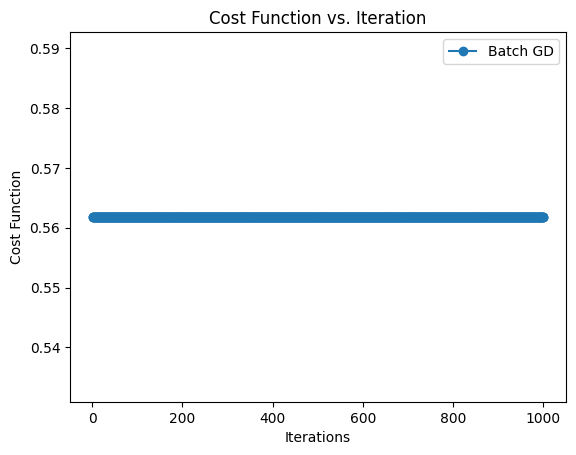

In [25]:
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()

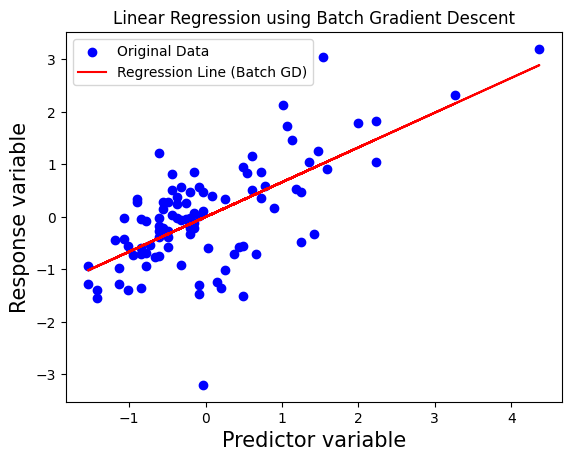

In [32]:
plt.scatter(X_norm, Y_norm, color="b", label="Original Data")
plt.plot(X_norm, m_batch*X_norm + b_batch, color="r", label="Regression Line (Batch GD)")
plt.xlabel('Predictor variable', fontsize=15)
plt.ylabel("Response variable", fontsize=15)
plt.title("Linear Regression using Batch Gradient Descent")
plt.legend()
plt.show()

In [35]:
def gradient_cost_wrt_m(m, b, x, y):
    return 2 * x * (m*x + b - y)

def gradient_cost_wrt_b(m, b, x, y):
    return 2 * (m*x + b - y)

In [36]:
def stochastic_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        for j in range(len(Y)):
            # Update parameters using stochastic gradient descent
            m = m - learning_rate * gradient_cost_wrt_m(m, b, X[j], Y[j])
            b = b - learning_rate * gradient_cost_wrt_b(m, b, X[j], Y[j])

        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

In [39]:
def mini_batch_gradient_descent(X, Y, learning_rate, batch_size, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        permutation = np.random.permutation(len(Y))
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        for j in range(0, len(Y), batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            Y_batch = Y_shuffled[j:j+batch_size]
            m = m - learning_rate * dEdm(m, b, X_batch, Y_batch)
            b = b - learning_rate * dEdb(m, b, X_batch, Y_batch)

        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

In [37]:
learning_rate_stochastic = 0.01
iterations_stochastic = 1000

# Perform linear regression using stochastic gradient descent
m_stochastic, b_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_norm, Y_norm, learning_rate_stochastic, iterations_stochastic)

# Display the results
print("Stochastic Gradient Descent - Coefficients:")
print("Slope (m):", m_stochastic)
print("Intercept (b):", b_stochastic)

Stochastic Gradient Descent - Coefficients:
Slope (m): 0.6358638969712458
Intercept (b): 0.03843935972402637


In [40]:
# 6th subpart
learning_rate_mini_batch = 0.1
batch_size_mini_batch = 20
iterations_mini_batch = 1000
m_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_norm, Y_norm, learning_rate_mini_batch, batch_size_mini_batch, iterations_mini_batch)


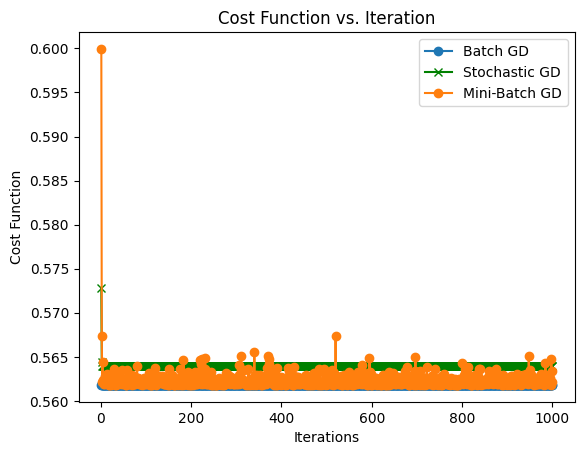

In [49]:
# 6th subpart cont
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.plot(range(1, iterations_stochastic + 1), cost_history_stochastic, color="g", label='Stochastic GD', marker='x')
plt.plot(range(1, iterations_mini_batch + 1), cost_history_mini_batch, label='Mini-Batch GD', marker='o')

plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()